# Определение перспективного тарифа для телеком-компании

Изучим данные, предоставленные сервисом для проекта.

## Шаг. Открыть файл с данными и изучить общую информацию.

In [2]:
#импортируем необходимые библиотеки
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns

#сохраняем каждый файл в датафрейм с соответствующим названием
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

Откроем каждый датафрейм и посторим на первые пять строк и общую информацию о нём.

In [71]:
#откроем все датасеты одной функцией.
def info_df(calls, internet, messages, tariffs, users): #на вход функция принимает все датасеты сразу
    df_all = [calls, internet, messages, tariffs, users]
    for i in df_all:
        display(i.head()) #и выводит нужную нам информацию  них
        display(i.info())
             
       
display(info_df(calls, internet, messages, tariffs, users))

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 5 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null int64
user_id      202607 non-null int64
month        202607 non-null int64
dtypes: int64(3), object(2)
memory usage: 7.7+ MB


None

,Unnamed: 0,id,mb_used,session_date,user_id,month
0,0,1000_0,112,2018-11-25,1000,11
1,1,1000_1,1052,2018-09-07,1000,9
2,2,1000_2,1197,2018-06-25,1000,6
3,3,1000_3,550,2018-08-22,1000,8
4,4,1000_4,302,2018-09-24,1000,9


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 6 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null int64
session_date    149396 non-null object
user_id         149396 non-null int64
month           149396 non-null int64
dtypes: int64(4), object(2)
memory usage: 6.8+ MB


None

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 4 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
month           123036 non-null int64
dtypes: int64(2), object(2)
memory usage: 3.8+ MB


None

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff                   2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

,user_id,city,tariff
0,1000,Краснодар,ultra
1,1001,Москва,smart
2,1002,Стерлитамак,smart
3,1003,Москва,ultra
4,1004,Новокузнецк,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
user_id    500 non-null int64
city       500 non-null object
tariff     500 non-null object
dtypes: int64(1), object(2)
memory usage: 11.8+ KB


None

None

Синтаксических и стилистических нарушений в написании столбцов не обнаружено. В датафрейме users видны пропуски в значениях столбца churn_date. Посмотрим каждый датафрейм методом .info()

Во всех датафремах значения одинаковы, кроме users - значение в столбце churn_date снамного меньше, чем во всех остальных. Значения в столбце duration датафрейма calls и столбце mb_used в датафрейме internet представлены типом float64. Судя из описания проекта, значения этих столбцов необходимо округлить в потолок и перевести в целочисленный тип данных. Обратимся к описанию данных датафреймов.

<div>
    <body>
<b>Таблица users (информация о пользователях)</b>:<br/>
user_id — уникальный идентификатор пользователя,<br/>
first_name — имя пользователя,<br/>
last_name — фамилия пользователя,<br/>
age — возраст пользователя (годы),<br/>
reg_date — дата подключения тарифа (день, месяц, год),<br/>
churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных),<br/>
city — город проживания пользователя,<br/>
tarif — название тарифного плана.<br/>

<b>Таблица calls (информация о звонках)</b>:<br/>
id — уникальный номер звонка,<br/>
call_date — дата звонка,<br/>
duration — длительность звонка в минутах,<br/>
user_id — идентификатор пользователя, сделавшего звонок.<br/>

<b>Таблица messages (информация о сообщениях)</b>:<br/>
id — уникальный номер сообщения,<br/>
message_date — дата сообщения,<br/>
user_id — идентификатор пользователя, отправившего сообщение.<br/>

<b>Таблица internet (информация об интернет-сессиях)</b>:<br/>
id — уникальный номер сессии<br/>
mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)<br/>
session_date — дата интернет-сессии<br/>
user_id — идентификатор пользователя<br/>

<b>Таблица tariffs (информация о тарифах)</b>:<br/>
tariff_name — название тарифа<br/>
rub_monthly_fee — ежемесячная абонентская плата в рублях<br/>
minutes_included — количество минут разговора в месяц, включённых в абонентскую плату<br/>
messages_included — количество сообщений в месяц, включённых в абонентскую плату<br/>
mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)<br/>
rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)<br/>
rub_per_message — стоимость отправки сообщения сверх тарифного пакета<br/>
rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)<br/>
    </body>
    </div>

**Вывод**

Таким образом, стоит округлить и привести указанные данные в целочисленный тип. Пропуски в столбце churn_date заменять не будем, поскольку в описании - это действующий тариф. Соответственно оставим как есть.

## Шаг. Предобработка данных.

### Привести данные к нужным типам.

In [14]:
#округляем в потолок и приводим в целочисленный тип столбец duration датафрейма calls
calls['duration'] = (np.ceil(calls['duration'])).astype('int')
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000


In [15]:
#приводим в целочисленный тип столбец mb_used датафрейма internet
internet['mb_used'] = (internet['mb_used']).astype('int')
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112,2018-11-25,1000
1,1,1000_1,1052,2018-09-07,1000
2,2,1000_2,1197,2018-06-25,1000
3,3,1000_3,550,2018-08-22,1000
4,4,1000_4,302,2018-09-24,1000


### Найти и исправить ошибки в данных.

Когда просматривали все датафреймы, было видно, что есть сведения о тарифах. Но в разных датафреймах он названы по разному. Поскольку нам предстоит объединять датафремы, следует и назвать эти столбцы одинаково.

In [16]:
#переименовываем столбец
tariffs = tariffs.rename(columns={'tariff_name':'tariff'})
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


### Необходимо посчитать для каждого пользователя:

#### Количество сделанных звонков и израсходованных минут разговора по месяцам.

Подготовим данные для дальнейших подсчётов.

In [17]:
calls['month'] = pd.DatetimeIndex(calls['call_date']).month #выделим месяц
calls.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12


In [18]:
#проверим тип данныхх у новых столбцов
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 5 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null int64
user_id      202607 non-null int64
month        202607 non-null int64
dtypes: int64(3), object(2)
memory usage: 7.7+ MB


In [19]:
calls_p = calls.pivot_table(index=['user_id', 'month'], values='id', aggfunc='count')
calls_p.reset_index(drop=False, inplace=True)
calls_p = calls_p.rename(columns={'id':'call_count'})
calls_p.head()

,user_id,month,call_count
0,1000,5,22
1,1000,6,43
2,1000,7,47
3,1000,8,52
4,1000,9,58


In [20]:
calls_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3174 entries, 0 to 3173
Data columns (total 3 columns):
user_id       3174 non-null int64
month         3174 non-null int64
call_count    3174 non-null int64
dtypes: int64(3)
memory usage: 74.5 KB


In [21]:
calls_pp = calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc='sum')
calls_pp.reset_index(drop=False, inplace=True)
calls_pp = calls_pp.rename(columns={'duration':'duration_count'})
calls_pp.head()

,user_id,month,duration_count
0,1000,5,159
1,1000,6,172
2,1000,7,340
3,1000,8,408
4,1000,9,466


In [22]:
calls_pp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3174 entries, 0 to 3173
Data columns (total 3 columns):
user_id           3174 non-null int64
month             3174 non-null int64
duration_count    3174 non-null int64
dtypes: int64(3)
memory usage: 74.5 KB


In [23]:
calls_pv = calls_p.merge(calls_pp, on=['user_id', 'month'], how='outer') #соединили таблички по кол-ву звонков и продолжительности минут
calls_pv.head()             

,user_id,month,call_count,duration_count
0,1000,5,22,159
1,1000,6,43,172
2,1000,7,47,340
3,1000,8,52,408
4,1000,9,58,466


In [24]:
calls_pv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3174 entries, 0 to 3173
Data columns (total 4 columns):
user_id           3174 non-null int64
month             3174 non-null int64
call_count        3174 non-null int64
duration_count    3174 non-null int64
dtypes: int64(4)
memory usage: 124.0 KB


#### Количество отправленных сообщений по месяцам.

In [25]:
messages['month'] = pd.DatetimeIndex(messages['message_date']).month #также выделяем месяц
messages.head()

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


In [26]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 4 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
month           123036 non-null int64
dtypes: int64(2), object(2)
memory usage: 3.8+ MB


In [27]:
messages_p = messages.pivot_table(index=['user_id'], values='id', aggfunc='count')
messages_p.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426 entries, 1000 to 1499
Data columns (total 1 columns):
id    426 non-null int64
dtypes: int64(1)
memory usage: 6.7 KB


In [28]:
messages_p = messages.pivot_table(index=['user_id', 'month'], values='id', aggfunc='count') #делаем табличку с кол-м сообщений
messages_p.reset_index(drop=False, inplace=True)
messages_p = messages_p.rename(columns={'id':'message_count'})
messages_p.head()

,user_id,month,message_count
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


In [29]:
messages_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2717 entries, 0 to 2716
Data columns (total 3 columns):
user_id          2717 non-null int64
month            2717 non-null int64
message_count    2717 non-null int64
dtypes: int64(3)
memory usage: 63.8 KB


#### Объем израсходованного интернет-трафика по месяцам.

In [30]:
internet['month'] = pd.DatetimeIndex(internet['session_date']).month #также выделяем месяц для дальнейших действий
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id,month
0,0,1000_0,112,2018-11-25,1000,11
1,1,1000_1,1052,2018-09-07,1000,9
2,2,1000_2,1197,2018-06-25,1000,6
3,3,1000_3,550,2018-08-22,1000,8
4,4,1000_4,302,2018-09-24,1000,9


In [31]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 6 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null int64
session_date    149396 non-null object
user_id         149396 non-null int64
month           149396 non-null int64
dtypes: int64(4), object(2)
memory usage: 6.8+ MB


In [32]:
internet_p = internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc='sum') #делаем таличку с кол-м израасходованного трафика
internet_p.reset_index(drop=False, inplace=True)
internet_p = internet_p.rename(columns={'id':'mb_used'})
internet_p.head()

,user_id,month,mb_used
0,1000,5,2252
1,1000,6,23213
2,1000,7,13988
3,1000,8,14043
4,1000,9,14556


In [33]:
internet_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 3 columns):
user_id    3203 non-null int64
month      3203 non-null int64
mb_used    3203 non-null int64
dtypes: int64(3)
memory usage: 75.2 KB


#### Помесячную выручку с каждого пользователя.

Для подсчётов нам нужно соединить подготовленные таблички в единый датафрейм. А для этого нужно подготовить табличку с пользователями, к ней мы будем крпеить все остальные таблички

In [34]:
users = users.drop(columns=['first_name', 'last_name', 'churn_date', 'reg_date', 'age'], axis=1)
users.head()

,user_id,city,tariff
0,1000,Краснодар,ultra
1,1001,Москва,smart
2,1002,Стерлитамак,smart
3,1003,Москва,ultra
4,1004,Новокузнецк,ultra


In [35]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
user_id    500 non-null int64
city       500 non-null object
tariff     500 non-null object
dtypes: int64(1), object(2)
memory usage: 11.8+ KB


In [36]:
df = users.merge(calls_pv, on=['user_id'], how='outer')
df = df.merge(internet_p, on=['user_id', 'month'], how='outer')
df = df.merge(messages_p, on=['user_id', 'month'], how='outer')
df = df.merge(tariffs, on=['tariff'], how='left')
df.head()

,user_id,city,tariff,month,call_count,duration_count,mb_used,message_count,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,Краснодар,ultra,5.0,22.0,159.0,2252.0,22.0,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0
1,1000,Краснодар,ultra,6.0,43.0,172.0,23213.0,60.0,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0
2,1000,Краснодар,ultra,7.0,47.0,340.0,13988.0,75.0,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0
3,1000,Краснодар,ultra,8.0,52.0,408.0,14043.0,81.0,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0
4,1000,Краснодар,ultra,9.0,58.0,466.0,14556.0,57.0,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3222 entries, 0 to 3221
Data columns (total 15 columns):
user_id                  3222 non-null int64
city                     3182 non-null object
tariff                   3182 non-null object
month                    3214 non-null float64
call_count               3174 non-null float64
duration_count           3174 non-null float64
mb_used                  3203 non-null float64
message_count            2717 non-null float64
messages_included        3182 non-null float64
mb_per_month_included    3182 non-null float64
minutes_included         3182 non-null float64
rub_monthly_fee          3182 non-null float64
rub_per_gb               3182 non-null float64
rub_per_message          3182 non-null float64
rub_per_minute           3182 non-null float64
dtypes: float64(12), int64(1), object(2)
memory usage: 402.8+ KB


In [38]:
df.isna().sum()

user_id                    0
city                      40
tariff                    40
month                      8
call_count                48
duration_count            48
mb_used                   19
message_count            505
messages_included         40
mb_per_month_included     40
minutes_included          40
rub_monthly_fee           40
rub_per_gb                40
rub_per_message           40
rub_per_minute            40
dtype: int64

Как видим есть пропуски, устраним их и перейдём к подсчёту

In [39]:
columns = ['city', 'tariff']

for i in columns:
    df[i] = df[i].fillna('')
    
    
columns = ['month', 
           'call_count', 
           'duration_count', 
           'mb_used', 
           'message_count', 
           'messages_included', 
           'mb_per_month_included', 
           'minutes_included', 
           'rub_monthly_fee', 
           'rub_per_gb', 
           'rub_per_message', 
           'rub_per_minute']

for i in columns:
    df[i] = df[i].fillna(0)
    
df.isna().sum()

user_id                  0
city                     0
tariff                   0
month                    0
call_count               0
duration_count           0
mb_used                  0
message_count            0
messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
dtype: int64

In [40]:
columns = ['month', 
           'call_count', 
           'duration_count', 
           'mb_used', 
           'message_count', 
           'messages_included', 
           'mb_per_month_included', 
           'minutes_included', 
           'rub_monthly_fee', 
           'rub_per_gb', 
           'rub_per_message', 
           'rub_per_minute']

for i in columns:
    df[i] = df[i].astype('int')
    
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3222 entries, 0 to 3221
Data columns (total 15 columns):
user_id                  3222 non-null int64
city                     3222 non-null object
tariff                   3222 non-null object
month                    3222 non-null int64
call_count               3222 non-null int64
duration_count           3222 non-null int64
mb_used                  3222 non-null int64
message_count            3222 non-null int64
messages_included        3222 non-null int64
mb_per_month_included    3222 non-null int64
minutes_included         3222 non-null int64
rub_monthly_fee          3222 non-null int64
rub_per_gb               3222 non-null int64
rub_per_message          3222 non-null int64
rub_per_minute           3222 non-null int64
dtypes: int64(13), object(2)
memory usage: 402.8+ KB


In [41]:
#вычесть бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика
#остаток умножить на значение из тарифного плана
#прибавить абонентскую плату, соответствующую тарифному плану

def monthly_revenue(row):
    sms = (row['message_count'] - row['messages_included']) * row['rub_per_message']
    min = (row['duration_count'] - row['minutes_included']) * row['rub_per_minute']
    gb = (row['mb_used'] - row['mb_per_month_included']) / 1024
    gb = np.ceil(gb) * row['rub_per_gb']
    total = sms + min + gb + row['rub_monthly_fee']
    total = (np.where((total < 0), 0, total)).astype('int')    
        
    return total

df['monthly_revenue'] = df.apply(monthly_revenue, axis=1)

df.head(10)

,user_id,city,tariff,month,call_count,duration_count,mb_used,message_count,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,monthly_revenue
0,1000,Краснодар,ultra,5,22,159,2252,22,1000,30720,3000,1950,150,1,1,0
1,1000,Краснодар,ultra,6,43,172,23213,60,1000,30720,3000,1950,150,1,1,0
2,1000,Краснодар,ultra,7,47,340,13988,75,1000,30720,3000,1950,150,1,1,0
3,1000,Краснодар,ultra,8,52,408,14043,81,1000,30720,3000,1950,150,1,1,0
4,1000,Краснодар,ultra,9,58,466,14556,57,1000,30720,3000,1950,150,1,1,0
5,1000,Краснодар,ultra,10,57,350,14690,73,1000,30720,3000,1950,150,1,1,0
6,1000,Краснодар,ultra,11,43,338,14745,58,1000,30720,3000,1950,150,1,1,0
7,1000,Краснодар,ultra,12,46,333,9808,70,1000,30720,3000,1950,150,1,1,0
8,1001,Москва,smart,11,59,430,18405,0,50,15360,500,550,200,3,3,790
9,1001,Москва,smart,12,63,414,14018,0,50,15360,500,550,200,3,3,0


**Вывод**

Подсчитали необходимые значения, добавив столбец в итоговый датафрейм.

## Шаг. Проанализировать данные.

### Необходимо описать поведение клиентов оператора, исходя из выборки.

Подготовим данные к выборке. Для этого сделаем другой датафрем тем же способом, слепив его из разных табличек. Теперь разбивать по месяцу не нужно. Усредним значения.

In [42]:
calls_ppm = calls_pp.pivot_table(index=['user_id'], values='duration_count', aggfunc='mean')
calls_pp.reset_index(drop=False, inplace=True)
calls_ppm.head()

,duration_count
user_id,
1000,320.750000
1001,422.000000
1002,216.714286
1003,764.400000
1004,123.375000


In [43]:
calls_ppm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 492 entries, 1000 to 1499
Data columns (total 1 columns):
duration_count    492 non-null float64
dtypes: float64(1)
memory usage: 7.7 KB


In [44]:
messages_pm = messages_p.pivot_table(index=['user_id'], values='message_count', aggfunc='mean')
messages_pm.reset_index(drop=False, inplace=True)
messages_pm.head()

,user_id,message_count
0,1000,62.0
1,1002,10.0
2,1003,76.0
3,1004,149.0
4,1005,46.0


In [45]:
messages_pm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 2 columns):
user_id          426 non-null int64
message_count    426 non-null float64
dtypes: float64(1), int64(1)
memory usage: 6.8 KB


In [46]:
internet_pm = internet_p.pivot_table(index=['user_id'], values='mb_used', aggfunc='mean')
internet_pm.reset_index(drop=False, inplace=True)
internet_pm.head()

,user_id,mb_used
0,1000,13411.875000
1,1001,16211.500000
2,1002,16555.714286
3,1003,11445.400000
4,1004,18612.125000


In [47]:
internet_pm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 2 columns):
user_id    497 non-null int64
mb_used    497 non-null float64
dtypes: float64(1), int64(1)
memory usage: 7.9 KB


In [48]:
df_m = users.merge(calls_ppm, on=['user_id'], how='outer')
df_m = df_m.merge(internet_pm, on=['user_id'], how='outer')
df_m = df_m.merge(messages_pm, on=['user_id'], how='outer')
df_m = df_m.merge(tariffs, on=['tariff'], how='left')
df_m.head()

,user_id,city,tariff,duration_count,mb_used,message_count,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,Краснодар,ultra,320.750000,13411.875000,62.0,1000,30720,3000,1950,150,1,1
1,1001,Москва,smart,422.000000,16211.500000,NaN,50,15360,500,550,200,3,3
2,1002,Стерлитамак,smart,216.714286,16555.714286,10.0,50,15360,500,550,200,3,3
3,1003,Москва,ultra,764.400000,11445.400000,76.0,1000,30720,3000,1950,150,1,1
4,1004,Новокузнецк,ultra,123.375000,18612.125000,149.0,1000,30720,3000,1950,150,1,1


In [49]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 13 columns):
user_id                  500 non-null int64
city                     500 non-null object
tariff                   500 non-null object
duration_count           492 non-null float64
mb_used                  497 non-null float64
message_count            426 non-null float64
messages_included        500 non-null int64
mb_per_month_included    500 non-null int64
minutes_included         500 non-null int64
rub_monthly_fee          500 non-null int64
rub_per_gb               500 non-null int64
rub_per_message          500 non-null int64
rub_per_minute           500 non-null int64
dtypes: float64(3), int64(8), object(2)
memory usage: 54.7+ KB


In [50]:
columns = ['duration_count', 
           'mb_used', 
           'message_count']

for i in columns:
    df_m[i] = df_m[i].fillna(0)
    df_m[i] = df_m[i].astype('int')
    
df_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 13 columns):
user_id                  500 non-null int64
city                     500 non-null object
tariff                   500 non-null object
duration_count           500 non-null int64
mb_used                  500 non-null int64
message_count            500 non-null int64
messages_included        500 non-null int64
mb_per_month_included    500 non-null int64
minutes_included         500 non-null int64
rub_monthly_fee          500 non-null int64
rub_per_gb               500 non-null int64
rub_per_message          500 non-null int64
rub_per_minute           500 non-null int64
dtypes: int64(11), object(2)
memory usage: 54.7+ KB


### Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?

In [51]:
df_mf = df_m.pivot_table(index='tariff', values=['duration_count', 'message_count', 'mb_used'])
df_mf.reset_index(drop=False, inplace=True)
df_mf.head()

,tariff,duration_count,mb_used,message_count
0,smart,418.068376,16123.222222,32.299145
1,ultra,524.288591,19443.315436,53.691275


Из общих выводов видно, что продолжительность минут, количество сообщений и потраченный трафик больше у тарифа Ультра.

### Посчитать среднее количество, дисперсию и стандартное отклонение.

In [52]:
df_mff = df_m.pivot_table(index='tariff', values=['duration_count', 'message_count', 'mb_used'], aggfunc= ['mean', 'var','std'])
df_mff.reset_index(drop=False, inplace=True)
df_mff.head()

tariff           mean                                        var  \
         duration_count       mb_used message_count duration_count   
0  smart     418.068376  16123.222222     32.299145   21471.269597   
1  ultra     524.288591  19443.315436     53.691275   80691.409396   

                                         std                             
        mb_used message_count duration_count      mb_used message_count  
0  1.347398e+07    702.033114     146.530780  3670.691395     26.495907  
1  7.091698e+07   2151.458099     284.062334  8421.221856     46.383813

У тарифа Ультра дисперсия и стандартное отклонение больше, чем у тарифа Смарт.

Для построения дальнейших гистограмм, выведим по новому датафрейму выручку.

In [53]:
#вычесть бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика
#остаток умножить на значение из тарифного плана
#прибавить абонентскую плату, соответствующую тарифному плану

def monthly_revenue(row):
    sms = (row['message_count'] - row['messages_included']) * row['rub_per_message']
    min = (row['duration_count'] - row['minutes_included']) * row['rub_per_minute']
    gb = (row['mb_used'] - row['mb_per_month_included']) / 1024
    gb = np.ceil(gb) * row['rub_per_gb']
    total = sms + min + gb + row['rub_monthly_fee']
    total = (np.where((total < 0), 0, total)).astype('int')    
        
    return total

df_m['monthly_revenue'] = df_m.apply(monthly_revenue, axis=1)

df_m.head(10)

,user_id,city,tariff,duration_count,mb_used,message_count,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,monthly_revenue
0,1000,Краснодар,ultra,320,13411,62,1000,30720,3000,1950,150,1,1,0
1,1001,Москва,smart,422,16211,0,50,15360,500,550,200,3,3,366
2,1002,Стерлитамак,smart,216,16555,10,50,15360,500,550,200,3,3,0
3,1003,Москва,ultra,764,11445,76,1000,30720,3000,1950,150,1,1,0
4,1004,Новокузнецк,ultra,123,18612,149,1000,30720,3000,1950,150,1,1,0
5,1005,Набережные Челны,smart,550,8296,46,50,15360,500,550,200,3,3,0
6,1006,Ульяновск,smart,318,14908,0,50,15360,500,550,200,3,3,0
7,1007,Москва,smart,486,14605,25,50,15360,500,550,200,3,3,433
8,1008,Челябинск,smart,339,13199,56,50,15360,500,550,200,3,3,0
9,1009,Пермь,smart,218,17718,11,50,15360,500,550,200,3,3,187


In [54]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 14 columns):
user_id                  500 non-null int64
city                     500 non-null object
tariff                   500 non-null object
duration_count           500 non-null int64
mb_used                  500 non-null int64
message_count            500 non-null int64
messages_included        500 non-null int64
mb_per_month_included    500 non-null int64
minutes_included         500 non-null int64
rub_monthly_fee          500 non-null int64
rub_per_gb               500 non-null int64
rub_per_message          500 non-null int64
rub_per_minute           500 non-null int64
monthly_revenue          500 non-null object
dtypes: int64(11), object(3)
memory usage: 58.6+ KB


### Построить гистограммы. Описать распределения.

Построим гистограммы по каждой услуге.

<function matplotlib.pyplot.show(*args, **kw)>

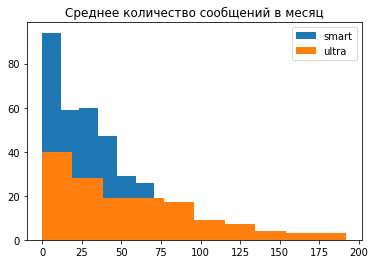

In [55]:
plt.hist(df_m[df_m['tariff'] == 'smart']['message_count'], label = 'smart')
plt.hist(df_m[df_m['tariff'] == 'ultra']['message_count'], label = 'ultra')
plt.legend(loc='upper right')
plt.title('Среднее количество сообщений в месяц')
plt.show

Как видно из графика распределение не нормально, а скошено вправо.

<function matplotlib.pyplot.show(*args, **kw)>

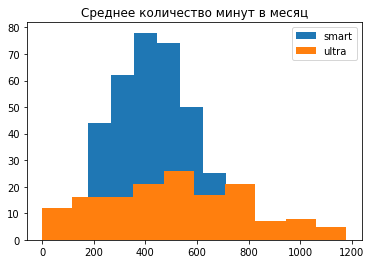

In [56]:
plt.hist(df_m[df_m['tariff'] == 'smart']['duration_count'], label = 'smart')
plt.hist(df_m[df_m['tariff'] == 'ultra']['duration_count'], label = 'ultra')
plt.legend(loc='upper right')
plt.title('Среднее количество минут в месяц')
plt.show

У тарифа Смарт распределение выглядит нормально, а у тарифа Ультра значения немного совсем скосилисьв отрицательную сторону.

<function matplotlib.pyplot.show(*args, **kw)>

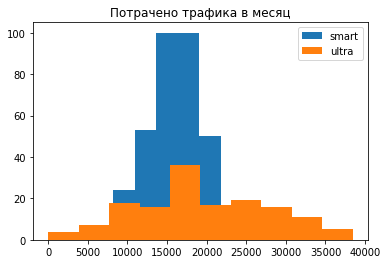

In [57]:
plt.hist(df_m[df_m['tariff'] == 'smart']['mb_used'], label = 'smart')
plt.hist(df_m[df_m['tariff'] == 'ultra']['mb_used'], label = 'ultra')
plt.legend(loc='upper right')
plt.title('Потрачено трафика в месяц')
plt.show

У тарифа Смарт график распредлён нлормально, а у тарифа Ультра значения скошены немного вправо.

**Вывод**

Как видно, по всем услугам тариф Смарт лидирует, на него больше тратят деньги.

## Шаг. Проверить гипотезы:

### Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.

<body>
Сформулируем гипотезы.<br/>
Нулевая гипотеза: "Средняя выручка пользователей тарифов "Ультра" и "Смарт" равна.<br/> 
Альтернативная гипотеза: "Средняя выручка пользователей тарифов "Ультра" и "Смарт" не равна."<br/>
Возьмём обычный уровень статистической значимости P≤0,05. Его можно интерпретировать так: "получен статистически значимый результат".
    </body>

In [58]:
#Подготовим данные 
df_mm = df_m.groupby(['tariff']).agg({'monthly_revenue':'sum'}).reset_index()
df_mm.columns = ['tariff', 'monthly_revenue']
df_mm

,tariff,monthly_revenue
0,smart,229565
1,ultra,0


In [59]:
v_ultra = df_m[(df_m['tariff'] == 'ultra')]['monthly_revenue'] #выборка по тарифу Ультра

v_smart = df_m[(df_m['tariff'] == 'smart')]['monthly_revenue'] #выборка по тарифу Смарт

alpha = .05 #критический уровень статистической значимости

res = st.ttest_ind(
      v_ultra,
      v_smart,
      equal_var = False) #параметр, задающий не считать равными дисперсии выборок

print('р-значение:', res.pvalue)

if res.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

р-значение: 1.7104493456972405e-55
Отвергаем нулевую гипотезу


Получается мы видим разные совершенно значения, и нулевая гипотеза отвергнута. Мы видим, что по тарифу Ультра нет выручки. Чтобы в этом разобраться, можно более детально посмотреть на датафрейм с заданными параметрами, превышающими абонентские значения (3000 минут, 1000 сообщений и 30 Гб).

In [60]:
#Сначала создадим датафрейм с тарифом Ультра из датафрейма с помесячной выручкой по каждому пользователю.
df_1 = df.query("tariff == 'ultra'")
df_1.head()

,user_id,city,tariff,month,call_count,duration_count,mb_used,message_count,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,monthly_revenue
0,1000,Краснодар,ultra,5,22,159,2252,22,1000,30720,3000,1950,150,1,1,0
1,1000,Краснодар,ultra,6,43,172,23213,60,1000,30720,3000,1950,150,1,1,0
2,1000,Краснодар,ultra,7,47,340,13988,75,1000,30720,3000,1950,150,1,1,0
3,1000,Краснодар,ultra,8,52,408,14043,81,1000,30720,3000,1950,150,1,1,0
4,1000,Краснодар,ultra,9,58,466,14556,57,1000,30720,3000,1950,150,1,1,0


In [61]:
#Отсортируем по значениям больше чем параметры абонентской платы.
df_2 = df_1[(df_1['duration_count'] > 3000)&(df['message_count'] > 1000)&(df['mb_used'] > 30)]
df_2.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,user_id,city,tariff,month,call_count,duration_count,mb_used,message_count,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,monthly_revenue


Вывод: получается правильно поставились нулевые значения, в датафрейме ни одного пользователя с выручкой по тарифу Ультра.

### Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

<body>
Сформулируем гипотезы.<br/>
Нулевая гипотеза: "Средняя выручка пользователей из Москвы равна выручке пользователей из других городов".<br/>
Альтернативная гипотеза: "Средняя выручка пользователей из Москвы отличается от выручки пользователей из других городов".<br/>
Возьмём обычный уровень статистической значимости P≤0,05. Его можно интерпретировать так: "получен статистически значимый результат".

In [62]:
df_gm = df_m.query("city == 'Москва'") #Выделяем город Москва
df_gm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 1 to 490
Data columns (total 14 columns):
user_id                  99 non-null int64
city                     99 non-null object
tariff                   99 non-null object
duration_count           99 non-null int64
mb_used                  99 non-null int64
message_count            99 non-null int64
messages_included        99 non-null int64
mb_per_month_included    99 non-null int64
minutes_included         99 non-null int64
rub_monthly_fee          99 non-null int64
rub_per_gb               99 non-null int64
rub_per_message          99 non-null int64
rub_per_minute           99 non-null int64
monthly_revenue          99 non-null object
dtypes: int64(11), object(3)
memory usage: 11.6+ KB


In [63]:
df_gmf = df_gm.groupby(['tariff']).agg({'monthly_revenue':'sum'}).reset_index()
df_gmf.columns = ['tariff', 'monthly_revenue']
df_gmf

,tariff,monthly_revenue
0,smart,37735
1,ultra,0


In [64]:
df_nm = df_m.query("city != 'Москва'") #Выделяем остальные города
df_nm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401 entries, 0 to 499
Data columns (total 14 columns):
user_id                  401 non-null int64
city                     401 non-null object
tariff                   401 non-null object
duration_count           401 non-null int64
mb_used                  401 non-null int64
message_count            401 non-null int64
messages_included        401 non-null int64
mb_per_month_included    401 non-null int64
minutes_included         401 non-null int64
rub_monthly_fee          401 non-null int64
rub_per_gb               401 non-null int64
rub_per_message          401 non-null int64
rub_per_minute           401 non-null int64
monthly_revenue          401 non-null object
dtypes: int64(11), object(3)
memory usage: 47.0+ KB


In [65]:
df_nmf = df_nm.groupby(['tariff']).agg({'monthly_revenue':'sum'}).reset_index()
df_nmf.columns = ['tariff', 'monthly_revenue']
df_nmf

,tariff,monthly_revenue
0,smart,191830
1,ultra,0


Тест проведём только по тарифу Смарт, поскольку у тарифа Ультра нулевые значения. 

In [66]:
#Проверяем на тарифе Смарт
v_smart_gm = df_gm[(df_gm['tariff'] == 'smart')]['monthly_revenue']

v_smart_nm = df_nm[(df_nm['tariff'] == 'smart')]['monthly_revenue']

alpha = .05 #критический уровень статистической значимости

res = st.ttest_ind(
      v_smart_gm,
      v_smart_nm,
      )

print('р-значение:', res.pvalue)

if res.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

р-значение: 0.2033135608740658
Не получилось отвергнуть нулевую гипотезу


Тест показал результат, что средние выручки равны, хотя разброс в значениях достаточно большой: около 38 000 и около 200 000.

Дополнительное исследование.

Данные показывают, что пользователи тарифа Смарт дают выручку. Посмотрим какие это пользователи, из каких городов.

In [67]:
df_smart = df_m.query("tariff == 'smart'") #сделаем датафрейм с тарифом только Смарт
df_smart.head()

,user_id,city,tariff,duration_count,mb_used,message_count,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,monthly_revenue
1,1001,Москва,smart,422,16211,0,50,15360,500,550,200,3,3,366
2,1002,Стерлитамак,smart,216,16555,10,50,15360,500,550,200,3,3,0
5,1005,Набережные Челны,smart,550,8296,46,50,15360,500,550,200,3,3,0
6,1006,Ульяновск,smart,318,14908,0,50,15360,500,550,200,3,3,0
7,1007,Москва,smart,486,14605,25,50,15360,500,550,200,3,3,433


In [68]:
#Сгруппируем по городу и посчитаем значения по выручке и количестве пользователей тарифа.
df_analyz = df_smart.groupby(['city']).agg({'user_id':'count', 'monthly_revenue':'sum'}).reset_index()
df_analyz.columns = ['city', 'user_id', 'monthly_revenue']
df_analyz.head() 

,city,user_id,monthly_revenue
0,Архангельск,1,596
1,Астрахань,3,2385
2,Балашиха,4,2085
3,Барнаул,2,0
4,Белгород,2,585


In [69]:
#отсортируем по пользователям и выручке по убыванию
df_analyz.sort_values(by=['user_id', 'monthly_revenue'], ascending=False).head()

,city,user_id,monthly_revenue
29,Москва,67,37735
47,Санкт-Петербург,30,22003
16,Казань,13,7483
36,Новосибирск,11,9281
62,Ульяновск,10,6669


Из анализа видно, лидирует Москва и Санкт-Петербург по количеству пользователей и выручке.

## Шаг. Написать общий вывод.

По итогам проведённого исследования можно сделать вывод такой: Выручку приносит тариф Смарт, а у тарифа Ультра ни с одного клиента не получено выручки. Пользователи тарифа Смарт из городов Москва и Санкт-Петербург лидируют и по количеству и по выручке. Из логических рассуждений, пользователям проще купить тариф с невысокой абонентской платой, и при необходимости доплатить за перерасходованные услуги. Абонентская плата тарифа Ультра достаточно высокая (1950 рублей в месяц!), хотя и включает большой набор услуг. Далеко не каждый человек будет платить такие деньги каждый месяц. Если и дальше не снижать абонентскую плату за тариф Ультра, тогда и не будет дохода у фирмы. Клиентам лучше предлагать услуги с минимальным набором и невысокой платой. Спрос возрастёт, а перерасход за услуги появится, что и приведёт к получнию прибыли.